In [172]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [173]:
## CHANGE
prepend_name="onek_"
experiment_name = "training_objectives"

metric = "avg_reward_in_topk_modes"
mode = "max"
top_percent = 0.5 # for calculating the distribution of the top_percent% of the data
percentile = 95

In [174]:
if mode == "max":
    ascending = False
elif mode == "min":
    ascending = True

In [175]:
# Find all folders in the directory
names = os.listdir(f'./logs/{prepend_name}{experiment_name}')
dataframes = [pd.read_csv(f'./logs/{prepend_name}{experiment_name}/{name}/dataframe.csv') for name in names]
df = pd.concat(dataframes, ignore_index=True)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: './logs/onek_training_objectives/qed_frag_FM/dataframe.csv'

In [ ]:
df["config/algo/helper"].value_counts(), df["config/task/helper"].value_counts()

(config/algo/helper
 TB        6
 DB        6
 FM        6
 SubTB1    6
 Name: count, dtype: int64,
 config/task/helper
 seh_frag     8
 drd2_frag    8
 qed_frag     8
 Name: count, dtype: int64)

In [ ]:
tasks = list(df["config/task/helper"].unique())

In [ ]:
#Separate the dataframes by task
dfs = {task: df[df["config/task/helper"] == task] for task in tasks}

In [ ]:
# Depending on the experimens, we specify what to compare by
if experiment_name == "training_objectives":
    column_name = "config/algo/helper"
elif experiment_name == "exploration":
    #TODO
    column_name = "config/replay/sampling/strategy"
methods = list(df[column_name].unique())

TASK: seh_frag
count    8.000000
mean     0.264521
std      0.027116
min      0.232287
25%      0.246487
50%      0.255677
75%      0.283568
max      0.311292
Name: avg_reward_in_topk_modes, dtype: float64



TASK: drd2_frag
count    8.000000
mean     0.010574
std      0.003750
min      0.007167
25%      0.008217
50%      0.009305
75%      0.011849
max      0.018418
Name: avg_reward_in_topk_modes, dtype: float64



TASK: qed_frag
count    8.000000
mean     0.439053
std      0.016581
min      0.420283
25%      0.426528
50%      0.435076
75%      0.455361
max      0.459789
Name: avg_reward_in_topk_modes, dtype: float64





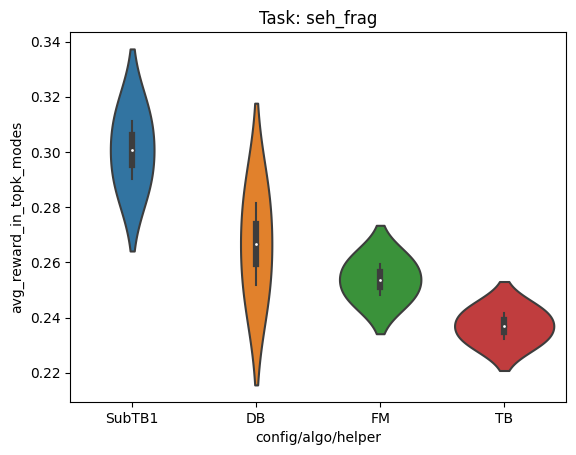

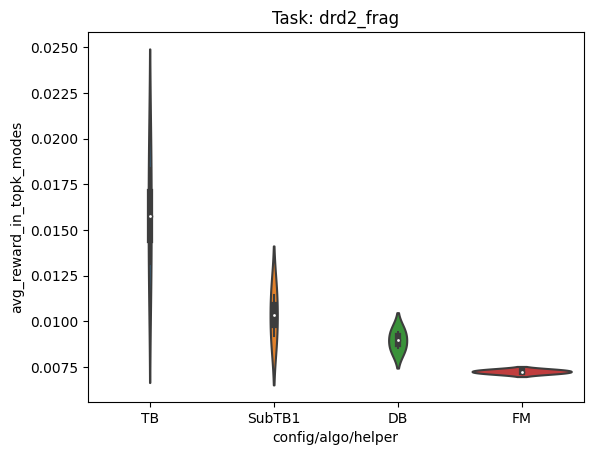

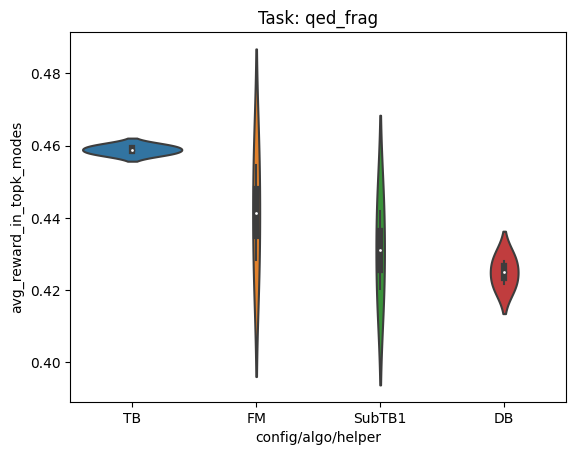

In [ ]:
plot_violin = True
plot_top_percent = False
plot_quantile = False

for task in tasks:
    print(f"TASK: {task}")
    df = dfs[task]
    print(df[metric].describe())
    df = df.sort_values(by=metric, ascending=ascending)
    
    # Plot the distribution of the top_percent% of the data
    if plot_top_percent:
        num_head = int(len(df)*top_percent)
        plt.figure()
        plt.title(f"Task: {task}, top {top_percent*100}% of data")
        df.head(num_head)["config/algo/helper"].value_counts().plot(kind="bar")

    # Plot the quantiles
    if plot_quantile:
        quantiles = []
        for method in methods:
            quantiles.append(df[df['config/algo/helper'] == method][metric].quantile(0.05))
        plt.figure()
        plt.title(f"Task: {task}, {percentile}th percentile")
        plt.bar(methods, quantiles)

    # Violin plots
    if plot_violin:
        plt.figure()
        plt.title(f"Task: {task}")
        sns.violinplot(x="config/algo/helper", y=metric, data=df)
    print("\n\n")